In [3]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.2 MB/s eta 0:00:00


In [18]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import fastf1.legacy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
from timple.timedelta import strftimedelta
from fastf1.core import Laps

In [6]:
plotting.setup_mpl(misc_mpl_mods=False)

ff1.Cache.enable_cache('../cache')

pd.options.mode.chained_assignment = None

In [42]:
# Load the session data
race = ff1.get_session(2024, 'Brazil', 'R')

race.load(weather = False)

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core     

In [19]:
quali = ff1.get_session(2024, 'Brazil', 'Q')
quali.load()
drivers = pd.unique(quali.laps['Driver'])

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTime'] = 0
fastest_laps['LapTimeDelta'] = 0
fastest_laps['LapNumber'] = 0
starting_grid = fastest_laps[['Driver','DriverNumber', 'LapTime', 'LapTimeDelta', 'LapNumber']]
starting_grid.index = range(1, len(starting_grid) + 1)
starting_grid.reset_index(inplace=True)
starting_grid = starting_grid.rename(columns = {'index':'Position'})


core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req     

/usr/local/lib/python3.11/dist-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.11/dist-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.

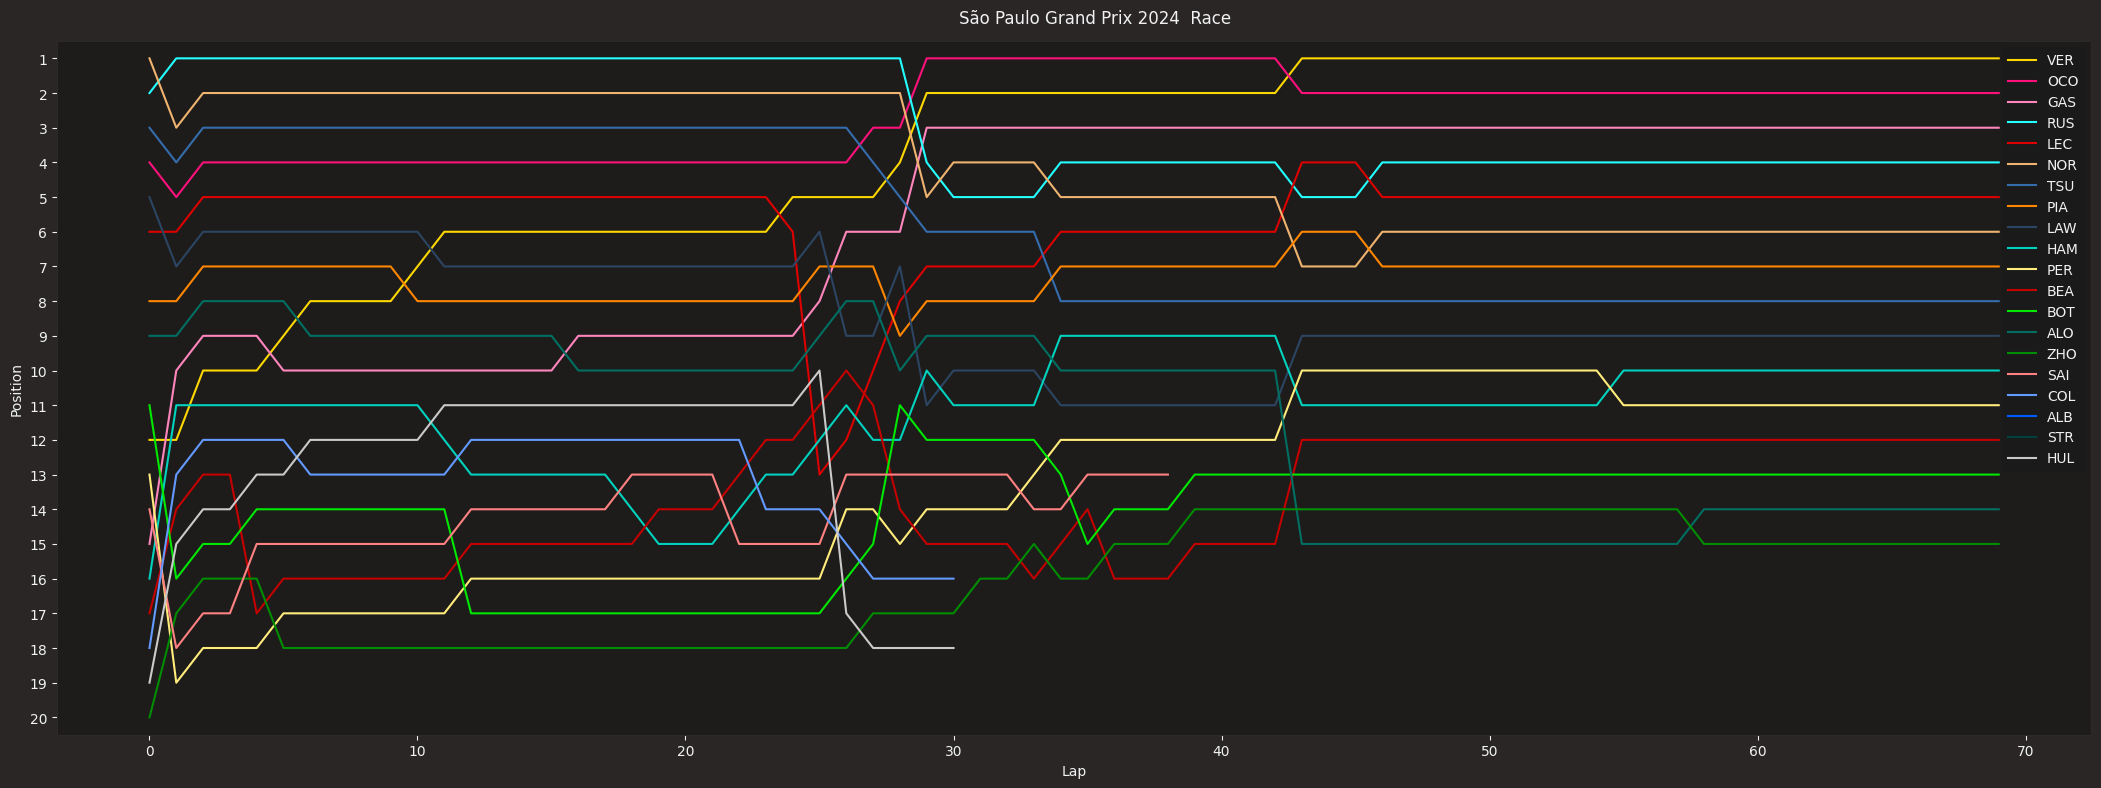

In [66]:
event = 'Race'
fig, ax = plt.subplots(figsize=(22, 8))
title = f"{race.event['EventName']} {race.event.year}  " + event
plt.suptitle(title)

for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)
    starting_pos = starting_grid.loc[starting_grid['DriverNumber'] == drv]
    drv_laps = pd.concat([starting_pos, drv_laps], ignore_index=True)
    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)
    ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks(range(1, 21))
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


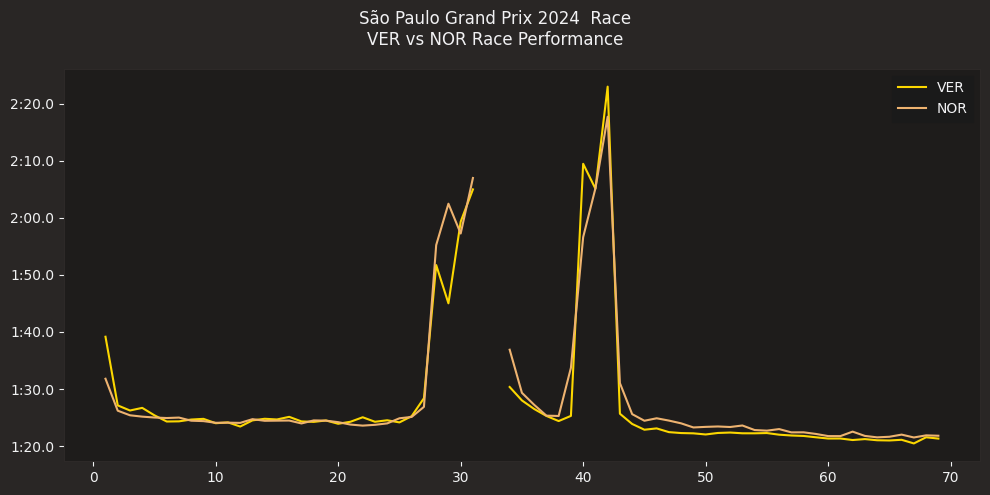

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))
title = f"{race.event['EventName']} {race.event.year}  " + event + "\nVER vs NOR Race Performance"
plt.suptitle(title)

for drv in ['VER', 'NOR']:
    drv_laps = race.laps.pick_driver(drv)
    if drv_laps.empty:  # Ensure there are laps for this driver
        continue
    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)
    ax.plot(drv_laps['LapNumber'], drv_laps['LapTime'], label=abb, color=color)


ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [48]:
# Combine telemetry data for VER and NOR
ver_lap = race.laps.pick_driver('VER').pick_fastest()
nor_lap = race.laps.pick_driver('NOR').pick_fastest()

ver_tel = ver_lap.get_telemetry().add_distance()
nor_tel = nor_lap.get_telemetry().add_distance()

ver_tel['Driver'] = 'VER'
nor_tel['Driver'] = 'NOR'

all_tel = ver_tel._append(nor_tel)

# Create mini-sectors
num_minisectors = 7*3

# Equally sized mini-sectors

total_distance = max(all_tel['Distance'])
minisector_length = total_distance / num_minisectors

# Add multiples of mini-sector length
minisectors = [0]
for i in range(1, num_minisectors):
    minisectors.append(minisector_length * i)

# Pick fastest diver for each mini-sector
all_tel['Minisector'] = all_tel['Distance'].apply(lambda x: (int((x // minisector_length))))

# Avg speeds
average_speeds = all_tel.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Pick fastest driver
fastest_driver = average_speeds.loc[average_speeds.groupby(['Minisector'])['Speed'].idxmax()]

# Remove speed attribute and rename Driver attribute
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'FastestDriver'})

# Join fastest driver per mini sector to full telemetry
all_tel = all_tel.merge(fastest_driver, on='Minisector')

# Order data by distance
all_tel = all_tel.sort_values(by='Distance')

# Convert driver name to int
all_tel.loc[all_tel['FastestDriver'] == 'VER', 'FastestDriver'] = 0
all_tel.loc[all_tel['FastestDriver'] == 'NOR', 'FastestDriver'] = 1
x = np.array(all_tel['X'].values)
y = np.array(all_tel['Y'].values)

# prepare map
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = all_tel['FastestDriver'].to_numpy().astype(float)

/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.11/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


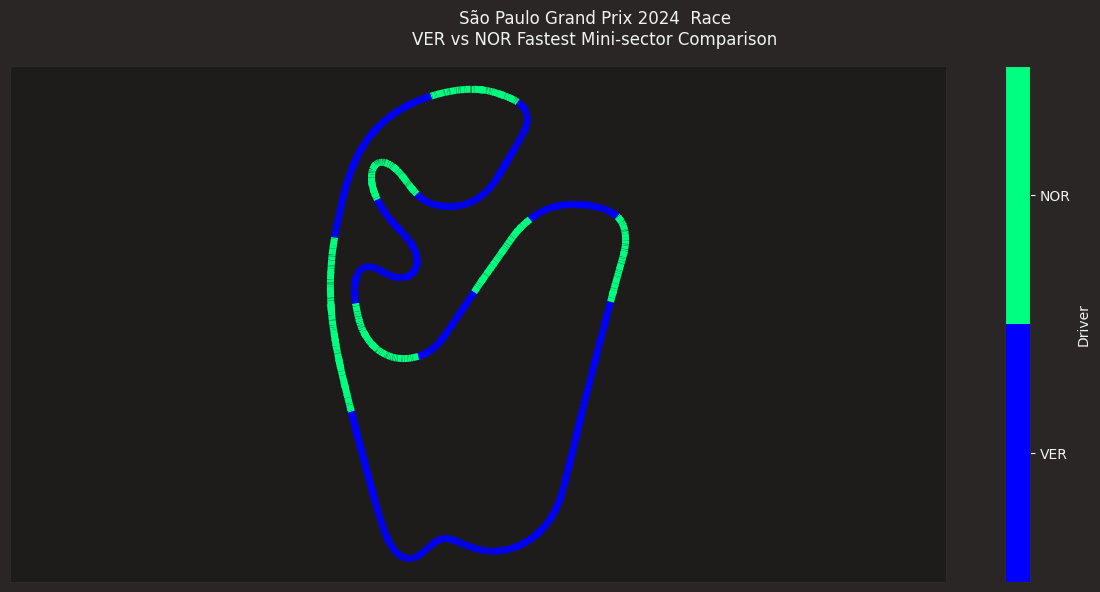

In [67]:
cmap = plt.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(0, 2), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [12, 6]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, label='Driver', boundaries=np.arange(0, 3))
cbar.set_ticks([0.5, 1.5])
cbar.set_ticklabels(['VER', 'NOR'])

title = f"{race.event['EventName']} {race.event.year}  " + event + "\nVER vs NOR Fastest Mini-sector Comparison"
plt.suptitle(title)

plt.tight_layout()
plt.show()